In [1]:
import torch

In [2]:
# Prediction: manually + PyTorch model
# Gradients computation: manually + Autograd
# Loss computation: manually + PyTorch Loss
# Parameter updates: manually + Pytorch Optimizer

### Linear regression
**With Numpy**

In [3]:
import numpy as np

In [4]:
# f = w * x = 2 *x

In [5]:
X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)
w = 0.0

In [6]:
# model prediction 
def forward(x):
    return w *x

In [7]:
# Loss = MSE = 1/N * (w*x-y)**2
def loss(y,y_predicted):
    return (((y_predicted - y)**2).mean())

In [8]:
# gradient 
# dJ/dw = 1/N * 2*x*(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted - y).mean()

In [9]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [10]:
# Training
learning_rate = 0.01
n_iters = 10
# n_iters = 20
for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = forward(X)
    # Loss
    l = loss(Y,y_pred)
    # Gradient
    dw = gradient(X,Y,y_pred)
    # Update weights
    w -= learning_rate * dw
    if epoch % 1 == 0:
    # if epoch % 2 == 0:
        print(f'epoch {epoch +1}: w = {w:.3f}, Loss = {l:.8f}')
print(f'Prediction after training f(5) = {forward(5):.3f}')

epoch 1: w = 1.200, Loss = 30.00000000
epoch 2: w = 1.680, Loss = 4.79999924
epoch 3: w = 1.872, Loss = 0.76800019
epoch 4: w = 1.949, Loss = 0.12288000
epoch 5: w = 1.980, Loss = 0.01966083
epoch 6: w = 1.992, Loss = 0.00314570
epoch 7: w = 1.997, Loss = 0.00050332
epoch 8: w = 1.999, Loss = 0.00008053
epoch 9: w = 1.999, Loss = 0.00001288
epoch 10: w = 2.000, Loss = 0.00000206
Prediction after training f(5) = 9.999


**With PyTorch**
* Gradienst computation: Autograd

In [11]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad = True)

In [12]:
# Model prediction
def forward(x):
    return w * x

In [13]:
# Loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [14]:
print(f'Prediction before training f(5) = {forward(5):.3f}')

Prediction before training f(5) = 0.000


In [16]:
# Training
learning_rate = 0.01
# n_iters = 10
n_iters = 100
for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = forward(X)
    # Loss
    l = loss(Y,y_pred)
    # Gradient = backward pass
    l.backward() # dLoss/dw
    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        # zero gradients
        w.grad.zero_()
    # if epoch % 1 == 0:
    if epoch % 10 == 0:
        print(f'epoch {epoch +1}: w = {w:.3f}, Loss = {l:.8f}')
print(f'Prediction after training f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, Loss = 30.00000000
epoch 11: w = 1.665, Loss = 1.16278565
epoch 21: w = 1.934, Loss = 0.04506890
epoch 31: w = 1.987, Loss = 0.00174685
epoch 41: w = 1.997, Loss = 0.00006770
epoch 51: w = 1.999, Loss = 0.00000262
epoch 61: w = 2.000, Loss = 0.00000010
epoch 71: w = 2.000, Loss = 0.00000000
epoch 81: w = 2.000, Loss = 0.00000000
epoch 91: w = 2.000, Loss = 0.00000000
Prediction after training f(5) = 10.000


* Prediction: PyTorch Model
* Loss Computation: PyTorch Loss
* Parameter updates: Pytorch Optimizer

1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop

* forward pass: compute prediction
* backward pass: gradients
* update weights

In [17]:
import torch.nn as nn

In [18]:
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

In [19]:
X_test = torch.tensor([5],dtype= torch.float32)

In [20]:
n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [21]:
input_size = n_features
output_size = n_features

In [22]:
# Model prediction
# model = nn.Linear(input_size, output_size)

In [23]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        """
        Le "__init__" est une méthode réservée dans les classes python. 
        Elle est connue sous le nom de constructeur dans la terminologie orientée objet. 
        Cette méthode, lorsqu'elle est appelée, permet à la classe d'initialiser ses attributs.
        """
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        """
        La fonction super() nous permet d'éviter d'utiliser explicitement le nom de la classe de base. 
        En Python, la fonction super() est appelée dynamiquement, contrairement à d'autres langages, 
        car il s'agit d'un langage dynamique. La fonction super() renvoie un objet qui représente la classe mère.
        """
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

In [24]:
print(f'Prediction before training f(5) = {model(X_test).item():.3f}')

Prediction before training f(5) = 2.446


In [25]:
# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # Prediction = forward pass
    y_pred = model(X)
    # Loss
    l = loss(Y,y_pred)
    # Gradient = backward pass
    l.backward() #
    # Update weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch +1}: w = {w[0][0]:.3f}, Loss = {l:.8f}')
print(f'Prediction after training f(5) = {model(X_test).item():.3f}')

epoch 1: w = 0.922, Loss = 20.21694946
epoch 11: w = 1.947, Loss = 0.55228329
epoch 21: w = 2.108, Loss = 0.04181056
epoch 31: w = 2.130, Loss = 0.02700158
epoch 41: w = 2.131, Loss = 0.02510972
epoch 51: w = 2.127, Loss = 0.02363996
epoch 61: w = 2.124, Loss = 0.02226374
epoch 71: w = 2.120, Loss = 0.02096791
epoch 81: w = 2.117, Loss = 0.01974747
epoch 91: w = 2.113, Loss = 0.01859808
Prediction after training f(5) = 10.227


**With datasets**

In [27]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 194.3 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 324.0 kB/s eta 0:00:00m eta 0:00:010:01:01


In [28]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [29]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

In [30]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [32]:
y.size()

torch.Size([100])

In [33]:
y = y.view(y.shape[0],1)

In [34]:
y.size()

torch.Size([100, 1])

1. Model

In [35]:
imput_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

2. Loss and Optimizer

In [36]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

3. Training loop

In [37]:
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    # backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch +1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4456.1255
epoch: 20, loss = 3321.8640
epoch: 30, loss = 2501.6086
epoch: 40, loss = 1907.7740
epoch: 50, loss = 1477.4191
epoch: 60, loss = 1165.2422
epoch: 70, loss = 938.5926
epoch: 80, loss = 773.9054
epoch: 90, loss = 654.1516
epoch: 100, loss = 567.0126


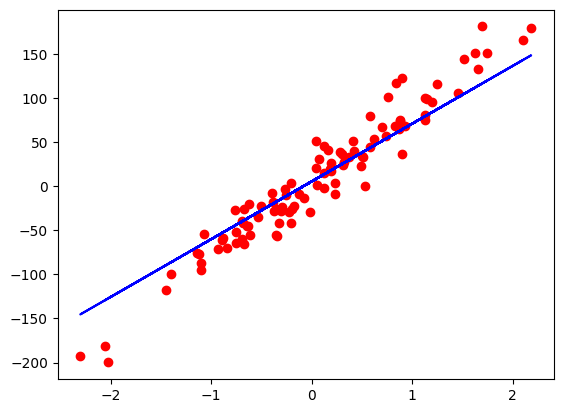

In [39]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')